<br> Ayman FAHSI | A20440820

Mouhammad BAZZI | A20522180


CS512 - Spring 2023</br> <h1><br><b><font color='red'>Baseline Model</font></br></h1>

## **Libraries Importation**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import lpips


## **Data Importation**

In [4]:
####################
# Global variables #
####################

# Path for data
corrup_data = '/content/drive/MyDrive/testFaces/test/corrupt train'
masks_data = '/content/drive/MyDrive/testFaces/test/masks'
target_data = '/content/drive/MyDrive/testFaces/test/target train'

In [5]:
####################
# Data importation


def import_data(corrupt_data_path, masks_data_path, target_data_path):
    # We initialize the lists that will contain the images
    corrupt_images = []
    masks = []
    target_images = []
    # We initialize the lists that will contain the images number
    corrupt_images_number = []
    masks_number = []
    target_images_number = []
    # We loop through the files in the folders and append the images to the lists
    for filename in os.listdir(corrupt_data_path):
        # We compute the image number (the number before the .jpg)
        image_number = int(filename.split('.')[0])
        # We append the image number to the list
        corrupt_images_number.append(image_number)
        # We create the path for the image
        file_path = os.path.join(corrupt_data_path, filename)
        # We read the image RGB
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        # We convert the image from BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # We resize the image to 512x512
        img = cv2.resize(img, (512, 512))
        # We append the image to the list
        corrupt_images.append(img)

    for filename in os.listdir(masks_data_path):
        # We compute the image number (the number before the .jpg)
        image_number = int(filename.split('.')[0])
        # We append the image number to the list
        masks_number.append(image_number)
        # We create the path for the image
        file_path = os.path.join(masks_data_path, filename)
        # We read the image grayscale
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        # We resize the image to 512x512
        img = cv2.resize(img, (512, 512))
        # We append the image to the list
        masks.append(img)

    for filename in os.listdir(target_data_path):
        # We compute the image number (the number before the .jpg)
        image_number = int(filename.split('.')[0])
        # We append the image number to the list
        target_images_number.append(image_number)
        # We create the path for the image
        file_path = os.path.join(target_data_path, filename)
        # We read the image RGB
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        # We convert the image from BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # We resize the image to 512x512
        img = cv2.resize(img, (512, 512))
        # We append the image to the list
        target_images.append(img)
    
    # We check that the images are in the same order
    if (corrupt_images_number != masks_number) or (corrupt_images_number != target_images_number) or (masks_number != target_images_number):
        # We order the images
        corrupt_images = [x for _, x in sorted(zip(corrupt_images_number, corrupt_images))]
        masks = [x for _, x in sorted(zip(masks_number, masks))]
        target_images = [x for _, x in sorted(zip(target_images_number, target_images))]

    # We convert the lists to numpy arrays
    corrupt_images = np.array(corrupt_images)
    masks = np.array(masks)
    target_images = np.array(target_images)
    
    return corrupt_images, masks, target_images



In [6]:
# We import the data

corrupt_images, masks, target_images = import_data(corrup_data, masks_data, target_data)

print('Corrupt images shape: ', corrupt_images.shape)
print('Masks shape: ', masks.shape)
print('Target images shape: ', target_images.shape)

Corrupt images shape:  (750, 512, 512, 3)
Masks shape:  (750, 512, 512)
Target images shape:  (750, 512, 512, 3)


#### **Data Visualization**

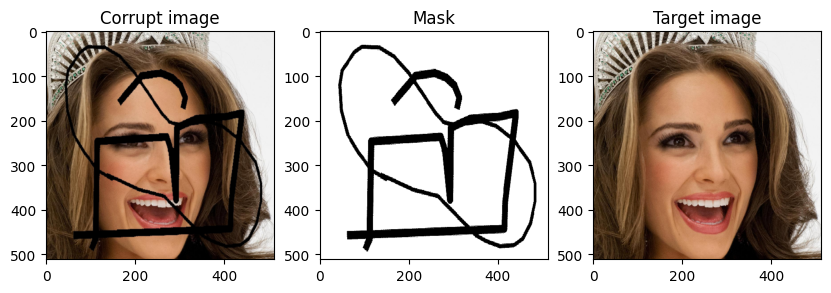

In [7]:
# Plotting one image to visualize the data
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(corrupt_images[0])
plt.title('Corrupt image')
plt.subplot(1, 3, 2)
plt.imshow(masks[0], cmap='gray')
plt.title('Mask')
plt.subplot(1, 3, 3)
plt.imshow(target_images[0])
plt.title('Target image')
plt.show()


## **Data Preprocessing**

In [8]:
####################
# Global variables #
####################

# For data split
training_percentage = 0.6
validation_percentage = 0.2

# Random state
random_state = 0

In [9]:
####################
# Data pre-processing

# We want the values to be between 0 and 1
corrupt_images = corrupt_images / 255
masks = masks / 255
target_images = target_images / 255

# We divide the data into training, validation and testing sets
test_percentage = 1 - training_percentage - validation_percentage
corrupt_images_train, corrupt_images_test, masks_train, masks_test, target_images_train, target_images_test = train_test_split(corrupt_images, masks, target_images, test_size = test_percentage, random_state = random_state)
corrupt_images_train, corrupt_images_val, masks_train, masks_val, target_images_train, target_images_val = train_test_split(corrupt_images_train, masks_train, target_images_train, test_size = validation_percentage / (1 - test_percentage), random_state = random_state)

# We want to print the shapes of the data
print('Corrupt images training set shape: ', corrupt_images_train.shape)
print('Masks training set shape: ', masks_train.shape)
print('Target images training set shape: ', target_images_train.shape)
print("\n")
print('Corrupt images validation set shape: ', corrupt_images_val.shape)
print('Masks validation set shape: ', masks_val.shape)
print('Target images validation set shape: ', target_images_val.shape)
print("\n")
print('Corrupt images testing set shape: ', corrupt_images_test.shape)
print('Masks testing set shape: ', masks_test.shape)
print('Target images testing set shape: ', target_images_test.shape)


Corrupt images training set shape:  (450, 512, 512, 3)
Masks training set shape:  (450, 512, 512)
Target images training set shape:  (450, 512, 512, 3)


Corrupt images validation set shape:  (150, 512, 512, 3)
Masks validation set shape:  (150, 512, 512)
Target images validation set shape:  (150, 512, 512, 3)


Corrupt images testing set shape:  (150, 512, 512, 3)
Masks testing set shape:  (150, 512, 512)
Target images testing set shape:  (150, 512, 512, 3)


## **Custom Loss Function**

In [10]:
# L1 loss
def l1_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_pred - y_true))

# Perceptual loss
def perceptual_loss(y_true, y_pred, feature_extractor):
    y_true_features = feature_extractor(y_true)
    y_pred_features = feature_extractor(y_pred)
    return l1_loss(y_true_features, y_pred_features)


# Edge loss
def edge_loss(y_true, y_pred):
    def sobel_edges(image):
        # Compute the gradient in x and y direction using Sobel operator
        sobel_x = tf.image.sobel_edges(image)[..., 0]
        sobel_y = tf.image.sobel_edges(image)[..., 1]
        epsilon = 1e-7  # Add a small epsilon value to avoid numerical instability
        return tf.sqrt(tf.add(tf.square(sobel_x), tf.square(sobel_y)) + epsilon)

    # Convert the images to grayscale
    y_true = tf.image.rgb_to_grayscale(y_true)
    y_pred = tf.image.rgb_to_grayscale(y_pred)
    y_true_edges = sobel_edges(y_true)
    y_pred_edges = sobel_edges(y_pred)
    return l1_loss(y_true_edges, y_pred_edges)

# Custom loss combining L1, perceptual, and edge losses
def create_custom_loss(vgg19_model):
    feature_extractor = tf.keras.Model(vgg19_model.input, vgg19_model.get_layer('block3_conv3').output)

    def custom_loss(y_true, y_pred):
        alpha = 10  # You can adjust these weights as needed
        beta = 2
        gamma = 3
        return alpha * l1_loss(y_true, y_pred) + beta * perceptual_loss(y_true, y_pred, feature_extractor) + gamma * edge_loss(y_true, y_pred)

    return custom_loss

In [11]:
# We instantiate the loss function
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=(512, 512, 3))
custom_loss_fn = create_custom_loss(vgg19)

80134624/80134624 [==============================] - 4s 0us/step


## **Custom Metrics**

In [12]:
# PSNR
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

# SSIM
def ssim(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

# L1 Loss
def l1_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

# LPIPS (Not Working)

from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity

def lpips(y_true, y_pred):
    _lpips = LearnedPerceptualImagePatchSimilarity(net_type='vgg')
    return _lpips(y_true, y_pred)



## **Model Building**

In [13]:
#We use a kind of U-Net architecture

def conv_block(x, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    return x

def build_model(input_shape_corrupt, input_shape_mask):
    # The Input layer
    input_corrupt = Input(shape=input_shape_corrupt)
    input_mask = Input(shape=input_shape_mask)
    
    # We concatenate the two inputs
    concat = concatenate([input_corrupt, input_mask], axis=3)

    # Encoder
    c1 = conv_block(concat, 32)
    p1 = MaxPooling2D(pool_size=(2, 2))(c1)

    c2 = conv_block(p1, 64)
    p2 = MaxPooling2D(pool_size=(2, 2))(c2)

    c3 = conv_block(p2, 128)
    p3 = MaxPooling2D(pool_size=(2, 2))(c3)

    c4 = conv_block(p3, 256)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = conv_block(p4, 512)

    # Decoder
    u6 = Conv2DTranspose(256, kernel_size=(2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = conv_block(u6, 256)

    u7 = Conv2DTranspose(128, kernel_size=(2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = conv_block(u7, 128)

    u8 = Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = conv_block(u8, 64)

    u9 = Conv2DTranspose(32, kernel_size=(2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = conv_block(u9, 32)

    # Output layer
    outputs = Conv2D(3, kernel_size=(1, 1), activation='sigmoid')(c9)

    return Model(inputs=[input_corrupt, input_mask], outputs=[outputs])

input_shape_corrupt = (512, 512, 3)
input_shape_mask = (512, 512, 1)
model = build_model(input_shape_corrupt, input_shape_mask)
model.compile(optimizer='adam', loss=custom_loss_fn,  metrics=[l1_loss, psnr, ssim])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 512, 512, 4)  0           ['input_2[0][0]',                
                                                                  'input_3[0][0]']          

## **Model Training**

In [14]:
####################
# Global variables #
####################

# For data split
epochs = 25
batch_size = 5

# Random state
random_state = 0

In [15]:
# We train the model


history = model.fit([corrupt_images_train, masks_train], target_images_train, batch_size = batch_size, epochs = epochs, validation_data = ([corrupt_images_val, masks_val], target_images_val))

Epoch 1/25
90/90 [==============================] - 34s 122ms/step - loss: 3.2683 - l1_loss: 0.0962 - psnr: 17.8637 - ssim: 0.6148 - val_loss: 5.3881 - val_l1_loss: 0.1845 - val_psnr: 13.5748 - val_ssim: 0.5849
Epoch 2/25
90/90 [==============================] - 9s 95ms/step - loss: 1.9767 - l1_loss: 0.0569 - psnr: 23.0491 - ssim: 0.7825 - val_loss: 4.5856 - val_l1_loss: 0.1539 - val_psnr: 15.2052 - val_ssim: 0.6385
Epoch 3/25
90/90 [==============================] - 9s 95ms/step - loss: 1.7522 - l1_loss: 0.0496 - psnr: 24.3227 - ssim: 0.8200 - val_loss: 3.6703 - val_l1_loss: 0.1171 - val_psnr: 17.3770 - val_ssim: 0.7078
Epoch 4/25
90/90 [==============================] - 9s 95ms/step - loss: 1.6617 - l1_loss: 0.0489 - psnr: 24.7114 - ssim: 0.8315 - val_loss: 2.5125 - val_l1_loss: 0.0705 - val_psnr: 21.7320 - val_ssim: 0.7862
Epoch 5/25
90/90 [==============================] - 9s 95ms/step - loss: 1.6141 - l1_loss: 0.0479 - psnr: 24.9860 - ssim: 0.8387 - val_loss: 1.7019 - val_l1_loss:

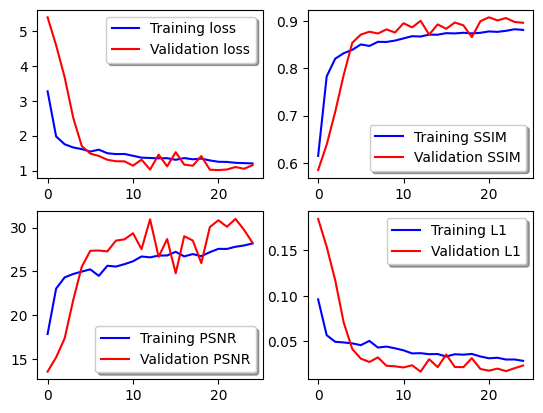

In [17]:
# We plot the loss and MAE curves for training and validation
fig, ax = plt.subplots(2,2)

ax[0][0].plot(history.history['loss'], color = 'b', label = 'Training loss')
ax[0][0].plot(history.history['val_loss'], color = 'r', label = 'Validation loss', axes = ax[0][0])
legend = ax[0][0].legend(loc = 'best', shadow = True)

ax[1][0].plot(history.history['psnr'], color = 'b', label = 'Training PSNR')
ax[1][0].plot(history.history['val_psnr'], color = 'r', label = 'Validation PSNR')
legend = ax[1][0].legend(loc = 'best', shadow = True)

ax[0][1].plot(history.history['ssim'], color = 'b', label = 'Training SSIM')
ax[0][1].plot(history.history['val_ssim'], color = 'r', label = 'Validation SSIM')
legend = ax[0][1].legend(loc = 'best', shadow = True)

ax[1][1].plot(history.history['l1_loss'], color = 'b', label = 'Training L1')
ax[1][1].plot(history.history['val_l1_loss'], color = 'r', label = 'Validation L1')
legend = ax[1][1].legend(loc = 'best', shadow = True)

## **Model Evaluation**

In [18]:
####################
# Global variables #
####################

# For data split
epochs_best = 25
batch_size_best = 5

# Random state
random_state = 0

In [30]:
# Evaluate the model on the test set but to do so we will train the model again on the whole training set
# We concatenate the training and validation sets
corrupt_images_train = np.concatenate((corrupt_images_train, corrupt_images_val), axis = 0)
masks_train = np.concatenate((masks_train, masks_val), axis = 0)
target_images_train = np.concatenate((target_images_train, target_images_val), axis = 0)

# We train the model again
model.compile(optimizer='adam', loss=custom_loss_fn,  metrics=[l1_loss, psnr, ssim])
history = model.fit([corrupt_images_train, masks_train], target_images_train, batch_size = batch_size_best, epochs = epochs_best)

# We evaluate the model on the test set
score = model.evaluate([corrupt_images_test, masks_test], target_images_test, verbose = 0)
print('Test loss:', score[0])
print('Test L1:', score[1])
print('Test PSNR:', score[2])
print('Test SSIM:', score[3])




Epoch 1/25
210/210 [==============================] - 26s 80ms/step - loss: 0.7675 - l1_loss: 0.0177 - psnr: 32.0528 - ssim: 0.9220
Epoch 2/25
210/210 [==============================] - 17s 80ms/step - loss: 0.7392 - l1_loss: 0.0168 - psnr: 32.4691 - ssim: 0.9244
Epoch 3/25
210/210 [==============================] - 17s 80ms/step - loss: 0.7478 - l1_loss: 0.0174 - psnr: 32.2829 - ssim: 0.9240
Epoch 4/25
210/210 [==============================] - 17s 80ms/step - loss: 0.7433 - l1_loss: 0.0170 - psnr: 32.4198 - ssim: 0.9252
Epoch 5/25
210/210 [==============================] - 17s 80ms/step - loss: 0.7423 - l1_loss: 0.0170 - psnr: 32.4233 - ssim: 0.9245
Epoch 6/25
210/210 [==============================] - 17s 80ms/step - loss: 0.7557 - l1_loss: 0.0182 - psnr: 32.0541 - ssim: 0.9233
Epoch 7/25
210/210 [==============================] - 17s 80ms/step - loss: 0.7363 - l1_loss: 0.0175 - psnr: 32.3612 - ssim: 0.9246
Epoch 8/25
210/210 [==============================] - 17s 80ms/step - loss: 

5/5 [==============================] - 1s 95ms/step


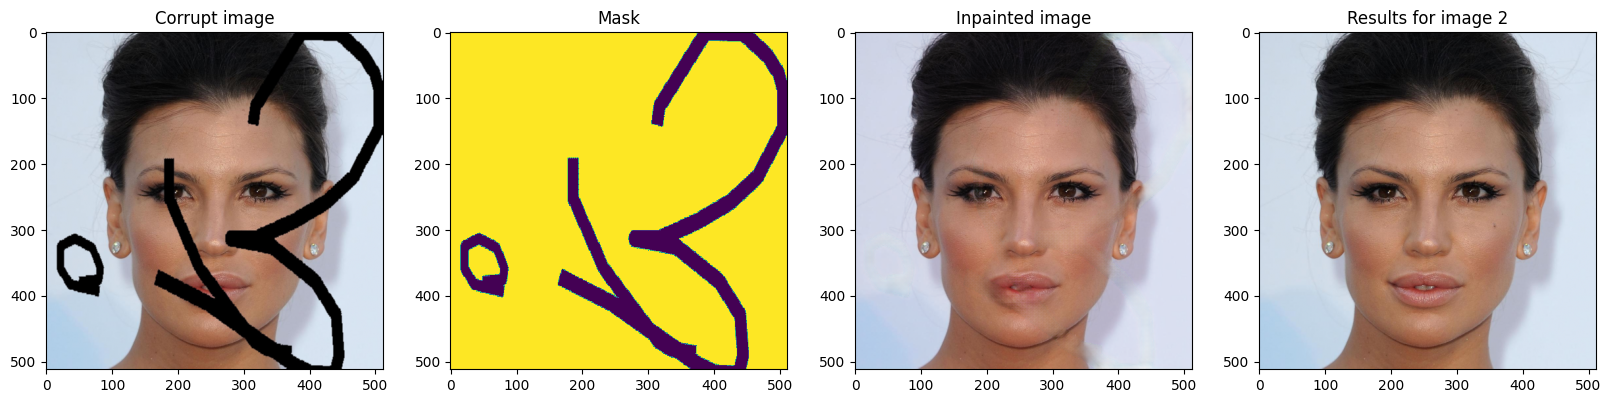

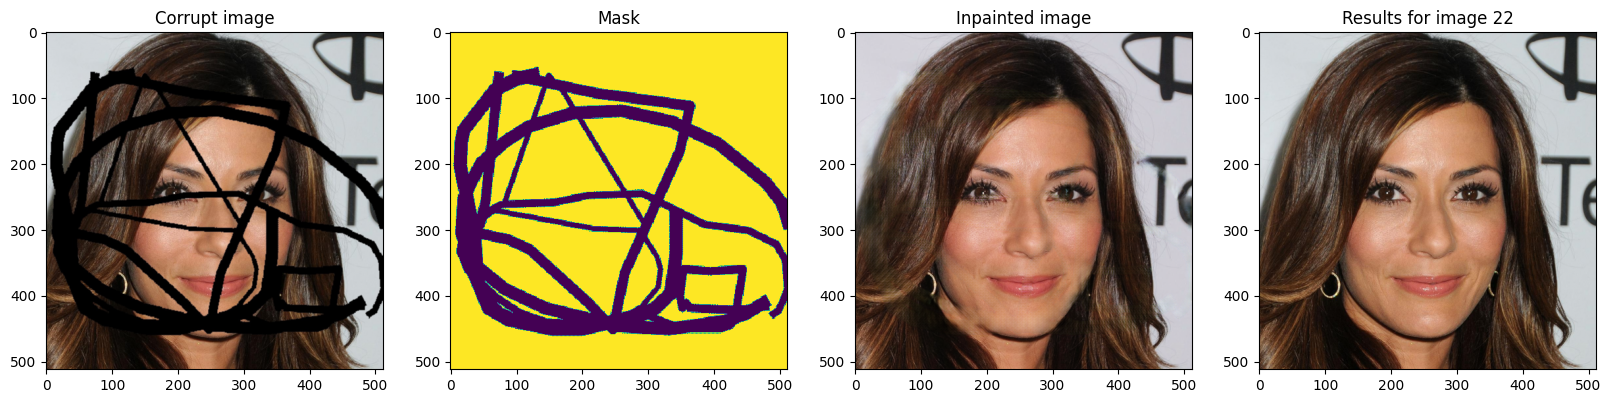

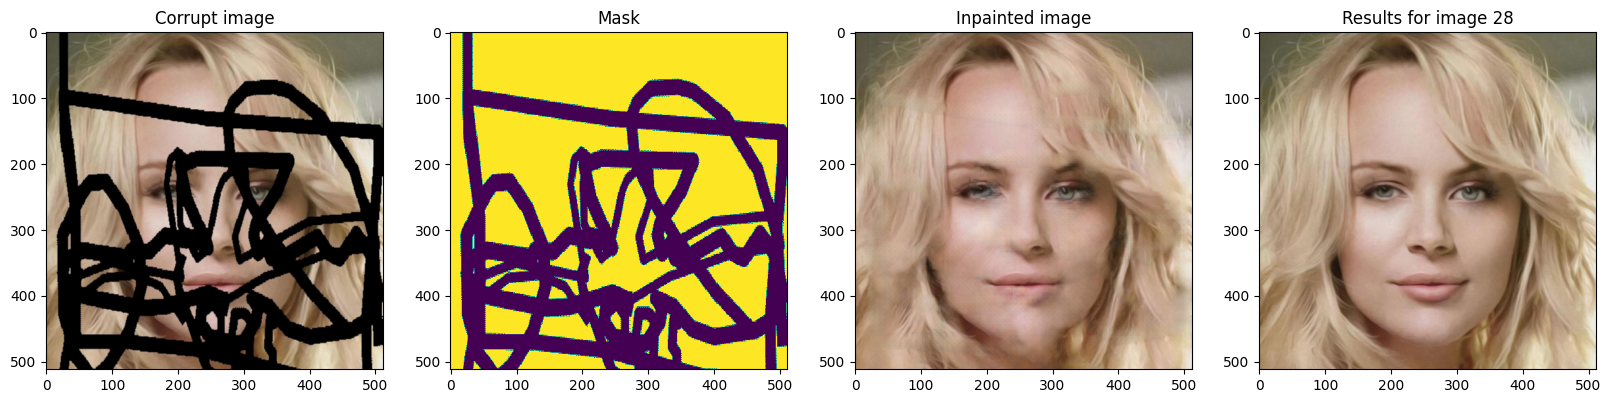

In [31]:
####################

# We predict the target images
predicted_images = model.predict([corrupt_images_test, masks_test])

# We plot the results for 1 image

# We want to plot in color the corupted image and the inpatinted image and the target image
def plot_result(n):
    corrupt_image = corrupt_images_test[n]
    mask = masks_test[n]
    predicted_image = predicted_images[n]
    target_image = target_images_test[n]
    

    # We plot the results
    fig, ax = plt.subplots(1, 4, figsize = (20, 20))
    ax[0].imshow(corrupt_image)
    ax[0].set_title('Corrupt image')
    ax[1].imshow(mask)
    ax[1].set_title('Mask')
    ax[2].imshow(predicted_image)
    ax[2].set_title('Inpainted image')
    ax[3].imshow(target_image)
    ax[3].set_title('Target image')
    plt.title('Results for image ' + str(n))
    
    plt.show()


plot_result(2)
plot_result(22)
plot_result(28)

In [20]:
model.save("baseline_inpainting.h5")

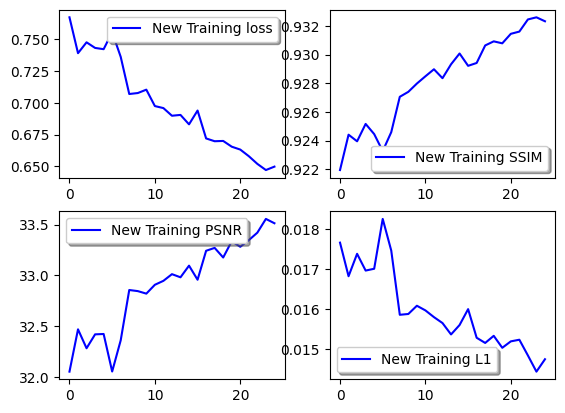

In [39]:
# We plot the loss and metric curves for training and validation
fig, ax = plt.subplots(2,2)

ax[0][0].plot(history.history['loss'], color = 'b', label = 'New Training loss')
legend = ax[0][0].legend(loc = 'best', shadow = True)

ax[1][0].plot(history.history['psnr'], color = 'b', label = 'New Training PSNR')
legend = ax[1][0].legend(loc = 'best', shadow = True)

ax[0][1].plot(history.history['ssim'], color = 'b', label = 'New Training SSIM')
legend = ax[0][1].legend(loc = 'best', shadow = True)

ax[1][1].plot(history.history['l1_loss'], color = 'b', label = 'New Training L1')
legend = ax[1][1].legend(loc = 'best', shadow = True)